In [1]:
from more_itertools import powerset
import numpy as np 
import itertools
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.patches import Rectangle
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors
from matplotlib.collections import PatchCollection

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
from Table import CreateTable, Pivotframe, writeText

In [18]:
sim_age=np.random.randint(0,100,(100000))
sim_weight=np.random.randint(1,600,(100000))
sim_height=np.random.randint(10,250,(100000))
sim_sex=np.random.randint(0,2,(100000))

data=np.column_stack((sim_age, sim_weight, sim_height, sim_sex))

sim_labels=sim_height/sim_weight

In [19]:
t=CreateTable(data, sim_labels, [4,8,8,2], False)

In [20]:
axis_x, axis_y = t.getRedXYaxis()
m=t.createMatrix()

In [21]:
p=Pivotframe(axis_x, axis_y, matrix=m, sep=0.01, featureSep=0.02, featureBox=0.04, x_names=["Weight", "Age"], y_names=["Sex", "Height"])

8
4


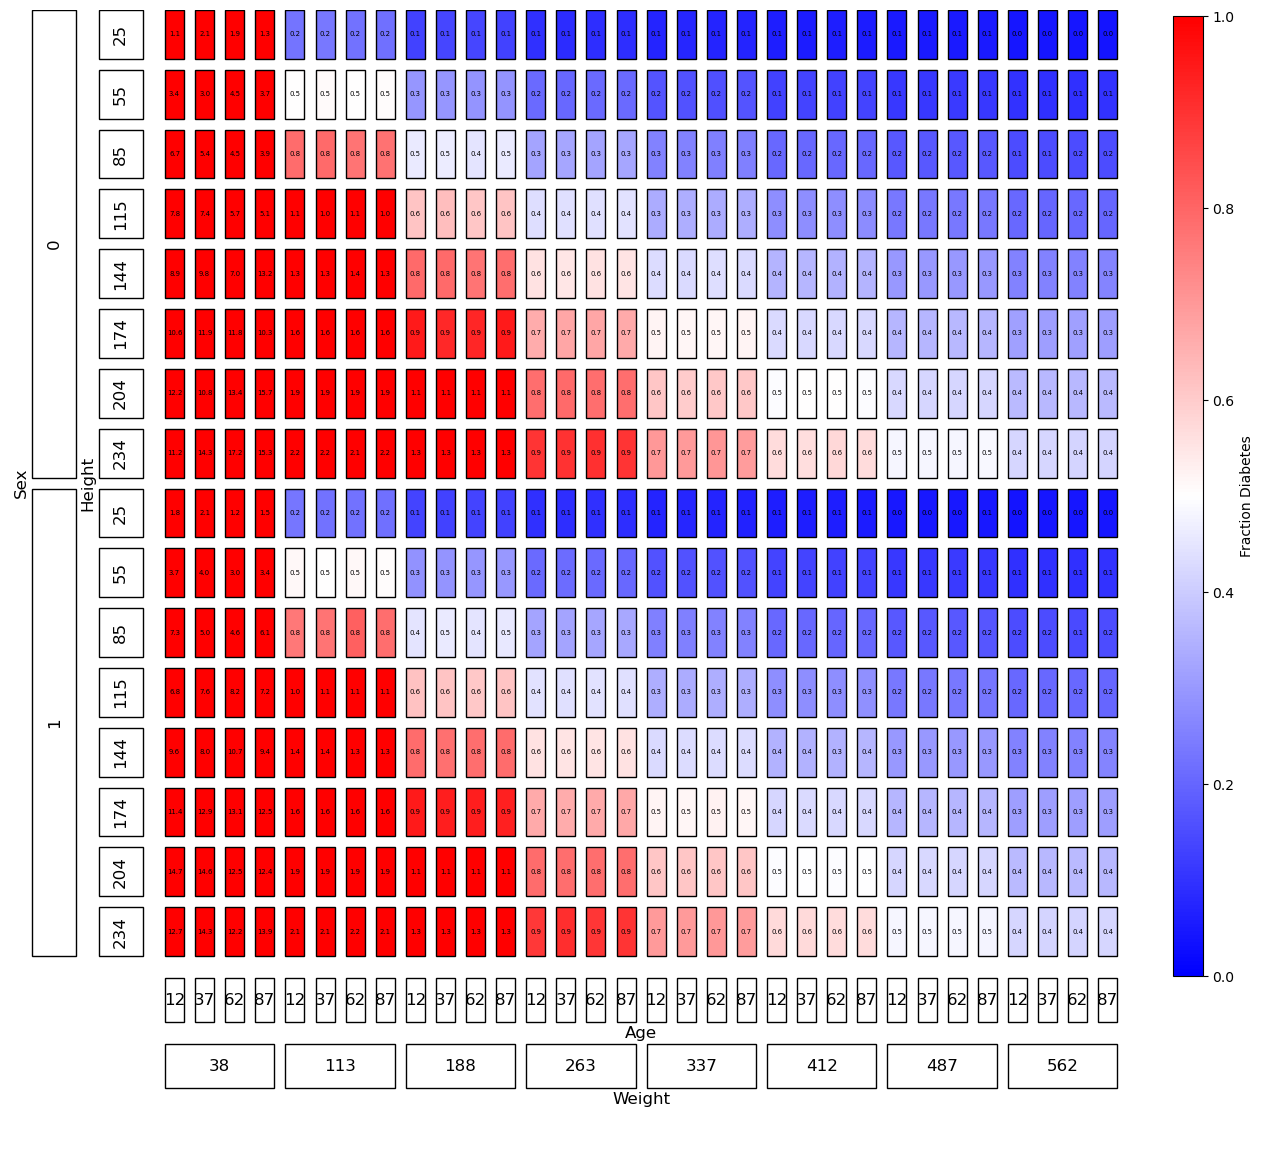

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sep=0.02
ax.set(xlim=[0., 1.05], ylim=[-0.05,1.])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

newcmp=matplotlib.colormaps["bwr"]
cax = fig.add_axes([0.9, 0.236, 0.02, 0.64])

#
# Make Y-axis
#
for b in p.y_boxes:
    writeText(ax, b[0],b[1], b[2], b[3], str(int(b[4])), rotation=90., mcolor="black")
    ax.add_patch(Rectangle((b[0], b[1]), b[2], b[3], 
                           linewidth=1, edgecolor='black', facecolor='none'))
        
#
# Make X-axis
#
for b in p.x_boxes:
    writeText(ax, b[0],b[1], b[2], b[3], str(int(b[4])), rotation=0., mcolor="black")
    ax.add_patch(Rectangle((b[0], b[1]), b[2], b[3], 
                           linewidth=1, edgecolor='black', facecolor='none'))

#
# Write text
#
for a in p.y_annot:
    ax.annotate(a[2], (a[0], a[1]), color="black", 
                fontsize=12, ha='center', va='center', rotation=90)

for a in p.x_annot:
    ax.annotate(a[2], (a[0], a[1]), color="black", 
                fontsize=12, ha='center', va='center', rotation=0)

#
# Make Matrix
#
for b in p.matrixBoxes:
    ax.add_patch(Rectangle((b[0], b[1]), b[2], b[3], 
                           linewidth=1, edgecolor='black', facecolor=newcmp(np.round(np.abs(b[4]),3))))
    writeText(ax, b[0],b[1], b[2], b[3], str(round(b[4],1)), rotation=0., mcolor="black", fs=5)

mpl.colorbar.ColorbarBase(cax,cmap=newcmp, orientation='vertical', label="Fraction Diabetes")